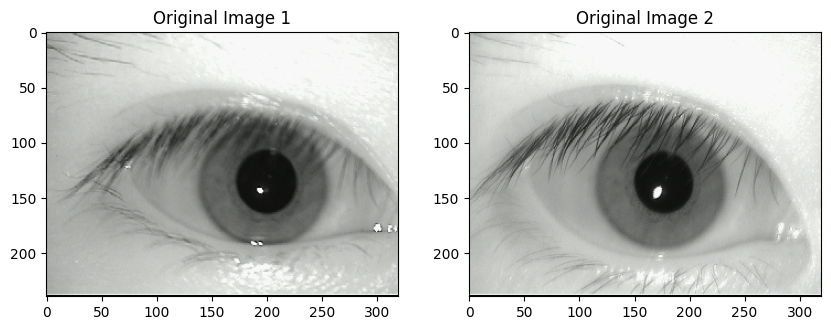

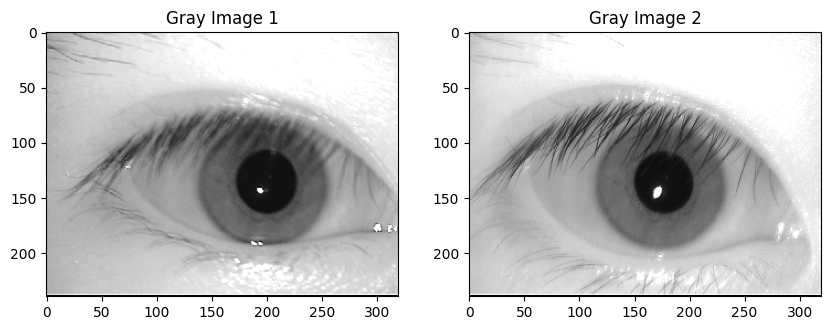

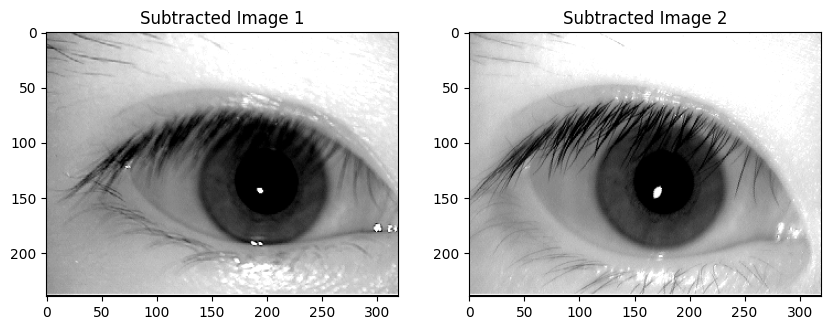

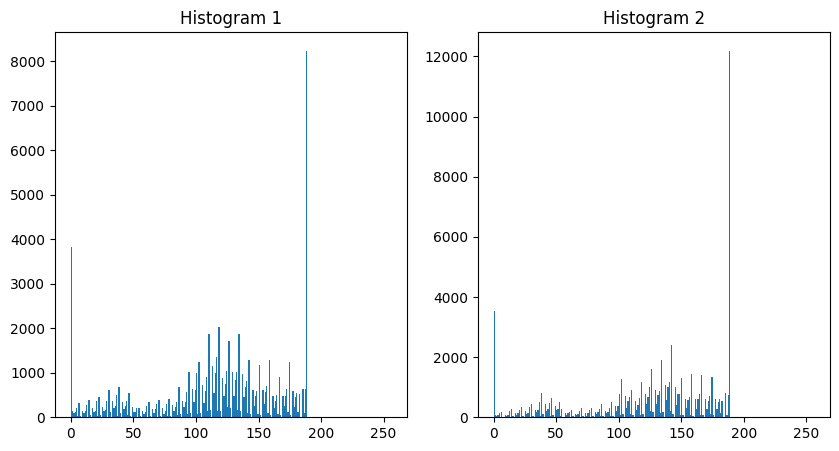

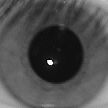

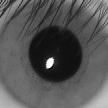

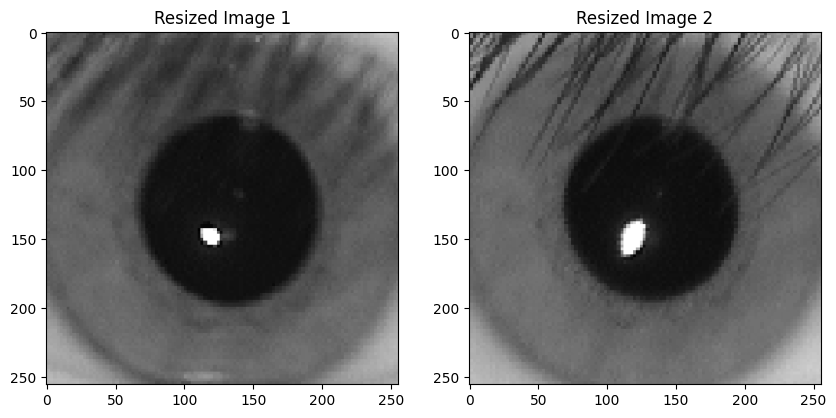

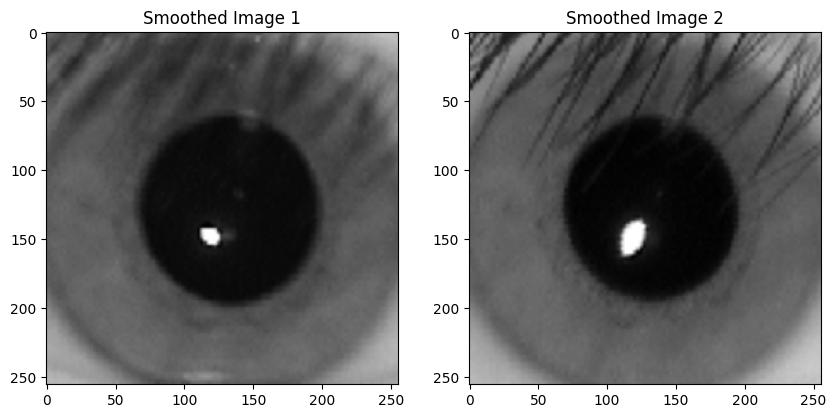

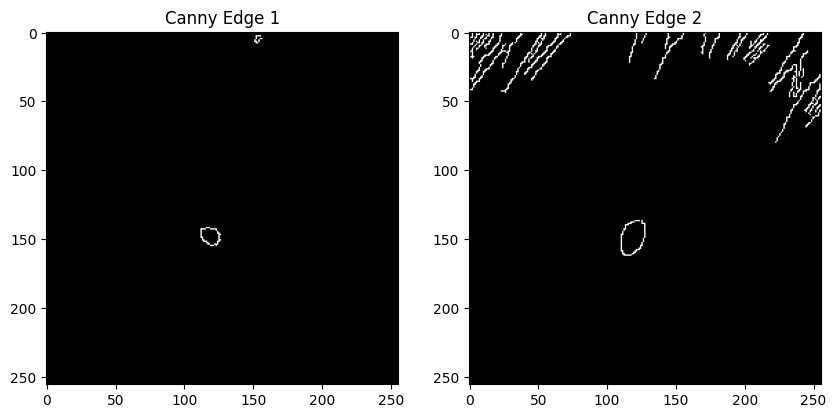

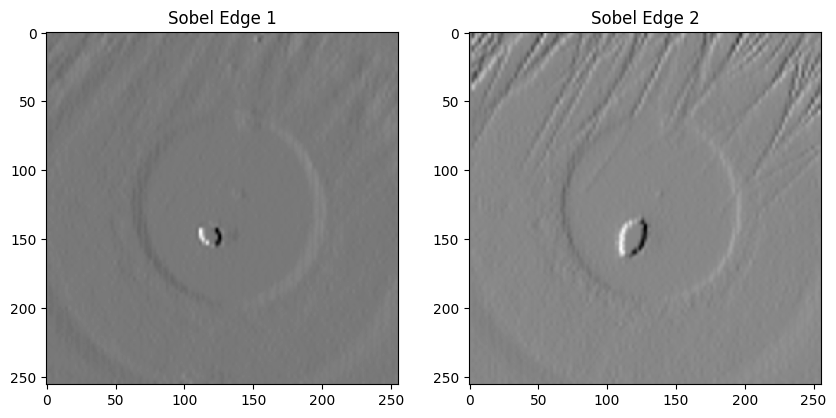

The iris are similar. [[0.9220342]]


In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature
from google.colab.patches import cv2_imshow

# Declaration
#im1 = input("Enter the 1st image path: ")
#im2 = input("Enter the 2nd image path:")
im1="/content/bryanr3.bmp"
im2="/content/bryanr4.bmp"




# STEP 1: Image Acquisition
img1 = cv2.imread(im1)
img2 = cv2.imread(im2)

# Check if images are loaded successfully
if img1 is None or img2 is None:
    print("Error loading images.")
else:
    # STEP 2: Convert to Grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Plotting Original and Grayscale Images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)), plt.title('Original Image 1')
    plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)), plt.title('Original Image 2')
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1), plt.imshow(gray1, cmap='gray'), plt.title('Gray Image 1')
    plt.subplot(1, 2, 2), plt.imshow(gray2, cmap='gray'), plt.title('Gray Image 2')
    plt.show()

    # STEP 3: Subtract Image
    subtracted1 = cv2.subtract(gray1, np.full(gray1.shape, 60, dtype=np.uint8))
    subtracted2 = cv2.subtract(gray2, np.full(gray2.shape, 60, dtype=np.uint8))

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1), plt.imshow(subtracted1, cmap='gray'), plt.title('Subtracted Image 1')
    plt.subplot(1, 2, 2), plt.imshow(subtracted2, cmap='gray'), plt.title('Subtracted Image 2')
    plt.show()

    # STEP 4: Histogram of the Image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1), plt.hist(subtracted1.ravel(), bins=256, range=(0, 256)), plt.title('Histogram 1')
    plt.subplot(1, 2, 2), plt.hist(subtracted2.ravel(), bins=256, range=(0, 256)), plt.title('Histogram 2')
    plt.show()

    # Detect and crop the irises with expanded radius for outer layer
    def detect_iris_outer_layer(image, expansion_ratio=2.0):
        blurred = cv2.GaussianBlur(image, (9, 9), 2)
        circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.2, minDist=100, param1=50, param2=30, minRadius=5, maxRadius=30)
        if circles is not None:
            circles = circles[0, :].astype("int")
            for (x, y, r) in circles:
                expanded_r = int(r * expansion_ratio)
                top, bottom = max(0, y - expanded_r), min(image.shape[0], y + expanded_r)
                left, right = max(0, x - expanded_r), min(image.shape[1], x + expanded_r)
                crop = image[top:bottom, left:right]
                return crop
        else:
            print("No iris detected.")
            return None

    crop1 = detect_iris_outer_layer(gray1)
    crop2 = detect_iris_outer_layer(gray2)

    # Display cropped images
    if crop1 is not None:
        cv2_imshow(crop1)
    if crop2 is not None:
        cv2_imshow(crop2)

    # Further steps if iris detection was successful
    if crop1 is not None and crop2 is not None:
        resized1 = cv2.resize(crop1, (256, 256), interpolation=cv2.INTER_NEAREST)
        resized2 = cv2.resize(crop2, (256, 256), interpolation=cv2.INTER_NEAREST)

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1), plt.imshow(resized1, cmap='gray'), plt.title('Resized Image 1')
        plt.subplot(1, 2, 2), plt.imshow(resized2, cmap='gray'), plt.title('Resized Image 2')
        plt.show()

        smoothed1 = cv2.GaussianBlur(resized1, (3, 3), 0)
        smoothed2 = cv2.GaussianBlur(resized2, (3, 3), 0)

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1), plt.imshow(smoothed1, cmap='gray'), plt.title('Smoothed Image 1')
        plt.subplot(1, 2, 2), plt.imshow(smoothed2, cmap='gray'), plt.title('Smoothed Image 2')
        plt.show()

        # Edge Detection
        edges1 = cv2.Canny(smoothed1, 100, 200)
        edges2 = cv2.Canny(smoothed2, 100, 200)

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1), plt.imshow(edges1, cmap='gray'), plt.title('Canny Edge 1')
        plt.subplot(1, 2, 2), plt.imshow(edges2, cmap='gray'), plt.title('Canny Edge 2')
        plt.show()

        # Sobel Edge Detection
        sobel1 = cv2.Sobel(smoothed1, cv2.CV_64F, 1, 0, ksize=3)
        sobel2 = cv2.Sobel(smoothed2, cv2.CV_64F, 1, 0, ksize=3)

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1), plt.imshow(sobel1, cmap='gray'), plt.title('Sobel Edge 1')
        plt.subplot(1, 2, 2), plt.imshow(sobel2, cmap='gray'), plt.title('Sobel Edge 2')
        plt.show()

        # Iris Matching
        normalized1 = cv2.normalize(smoothed1, None, 0, 255, cv2.NORM_MINMAX)
        normalized2 = cv2.normalize(smoothed2, None, 0, 255, cv2.NORM_MINMAX)
        correlation = cv2.matchTemplate(normalized1, normalized2, cv2.TM_CCOEFF_NORMED)

        # Displaying matching result
        if np.max(correlation) >= 0.85:
            print("The iris are similar.", correlation)
        else:
            print("The iris are different.", correlation)
    else:
        print("Failed to detect iris in one or both images. Cannot proceed with further steps.")


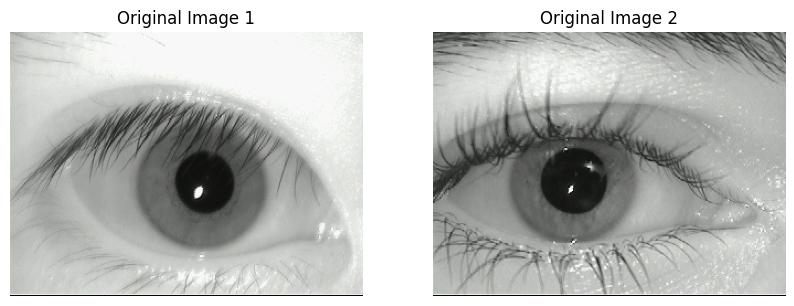

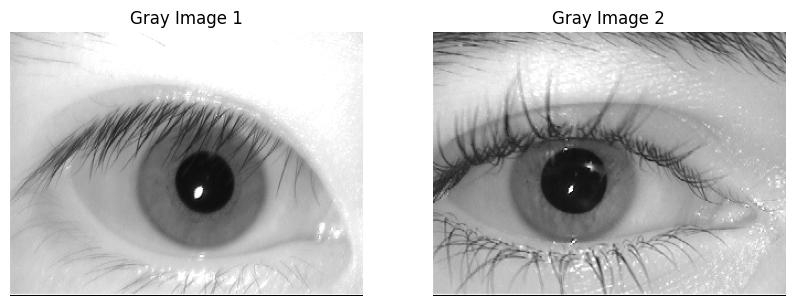

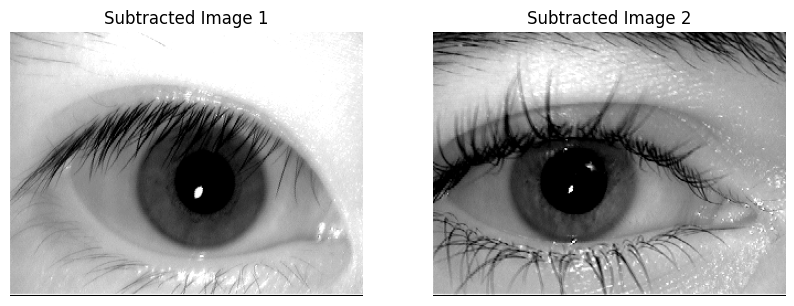

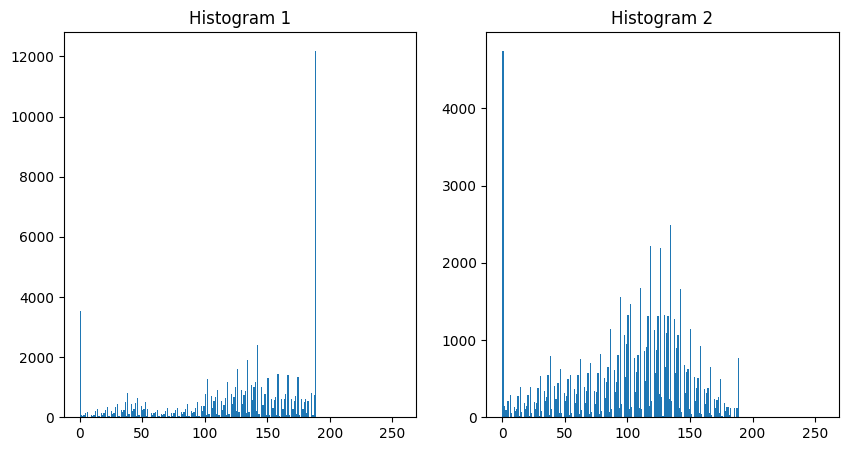

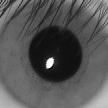

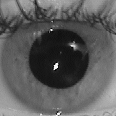

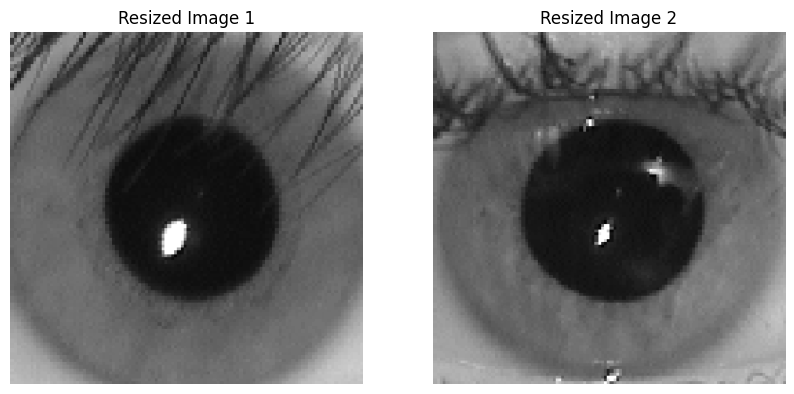

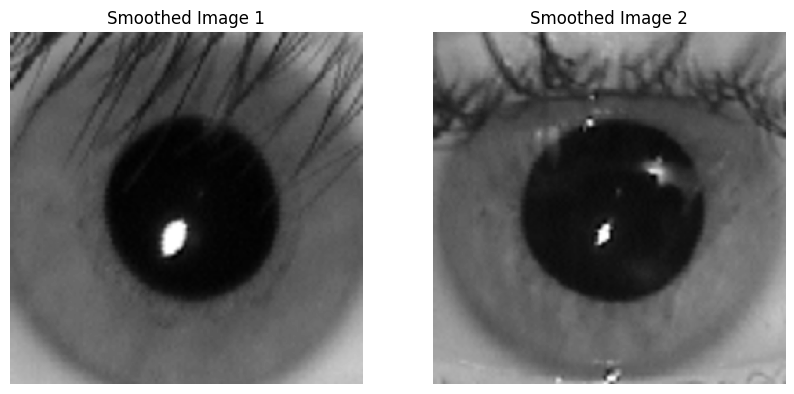

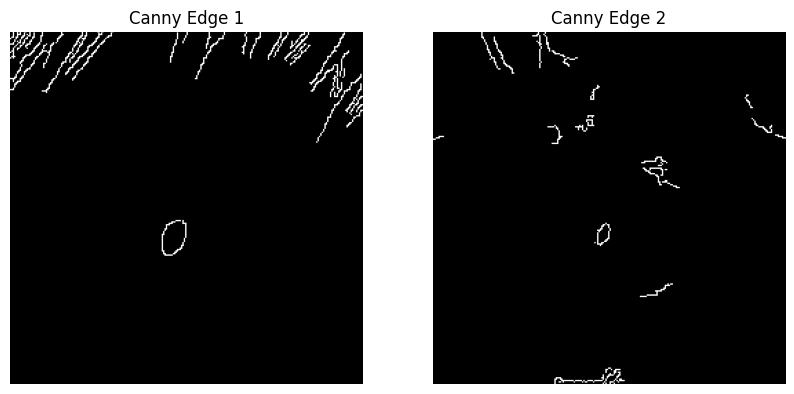

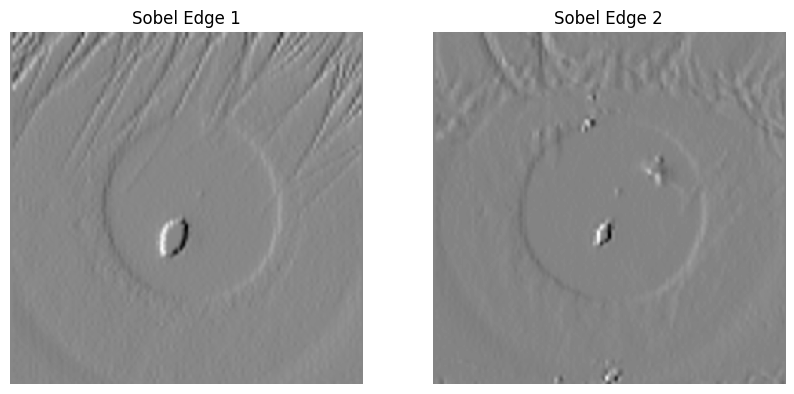

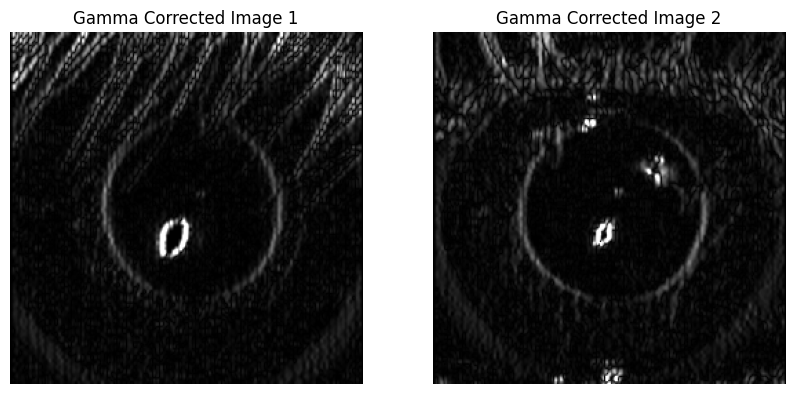

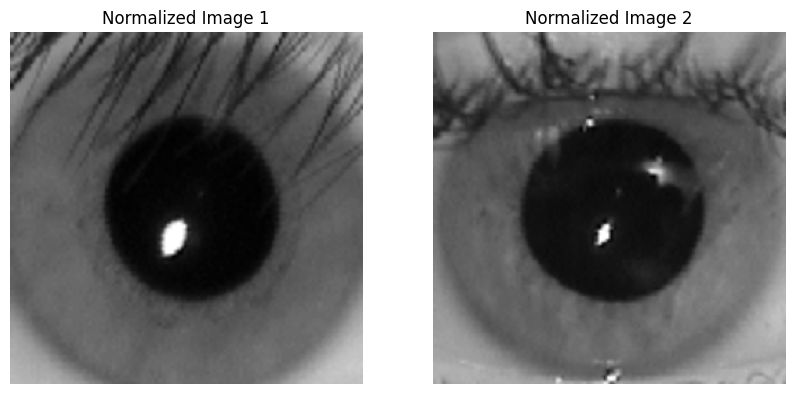

The iris are different. Correlation: 0.7718793


In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# File Paths
im1 = '/content/bryanr4.bmp'  # Update with the correct path
im2 = '/content/maranr1.bmp'  # Update with the correct path

# STEP 1: Image Acquisition
img1 = cv2.imread(im1)
img2 = cv2.imread(im2)

# Check if images are loaded successfully
if img1 is None or img2 is None:
    print("Error loading images.")
    exit()

# STEP 2: Convert to Grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Function to display images side by side
def display_images(images, titles, cmap=None, figsize=(10, 5)):
    plt.figure(figsize=figsize)
    for i, (image, title) in enumerate(zip(images, titles), 1):
        plt.subplot(1, len(images), i)
        plt.imshow(image, cmap=cmap)
        plt.title(title)
        plt.axis('off')
    plt.show()

# Display Original and Grayscale Images
display_images(
    [cv2.cvtColor(img1, cv2.COLOR_BGR2RGB), cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)],
    ['Original Image 1', 'Original Image 2']
)
display_images([gray1, gray2], ['Gray Image 1', 'Gray Image 2'], cmap='gray')

# STEP 3: Subtract Image
subtracted1 = cv2.subtract(gray1, np.full(gray1.shape, 60, dtype=np.uint8))
subtracted2 = cv2.subtract(gray2, np.full(gray2.shape, 60, dtype=np.uint8))

# Display Subtracted Images
display_images([subtracted1, subtracted2], ['Subtracted Image 1', 'Subtracted Image 2'], cmap='gray')

# STEP 4: Histogram of the Image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.hist(subtracted1.ravel(), bins=256, range=(0, 256)), plt.title('Histogram 1')
plt.subplot(1, 2, 2), plt.hist(subtracted2.ravel(), bins=256, range=(0, 256)), plt.title('Histogram 2')
plt.show()

# STEP 5: Iris Detection and Cropping
def detect_iris_outer_layer(image, expansion_ratio=2.0):
    blurred = cv2.GaussianBlur(image, (9, 9), 2)
    circles = cv2.HoughCircles(
        blurred, cv2.HOUGH_GRADIENT, dp=1.2, minDist=100, param1=50, param2=30, minRadius=5, maxRadius=30
    )
    if circles is not None:
        x, y, r = circles[0][0].astype("int")
        expanded_r = int(r * expansion_ratio)
        top, bottom = max(0, y - expanded_r), min(image.shape[0], y + expanded_r)
        left, right = max(0, x - expanded_r), min(image.shape[1], x + expanded_r)
        return image[top:bottom, left:right]
    print("No iris detected.")
    return None

crop1 = detect_iris_outer_layer(gray1)
crop2 = detect_iris_outer_layer(gray2)

# Display Cropped Images
if crop1 is not None and crop2 is not None:
    cv2_imshow(crop1)
    cv2_imshow(crop2)
else:
    print("Failed to detect iris in one or both images. Exiting.")
    exit()

# STEP 6: Resize Images
resized1 = cv2.resize(crop1, (256, 256), interpolation=cv2.INTER_NEAREST)
resized2 = cv2.resize(crop2, (256, 256), interpolation=cv2.INTER_NEAREST)
display_images([resized1, resized2], ['Resized Image 1', 'Resized Image 2'], cmap='gray')

# STEP 7: Image Smoothing using Gaussian Filter
smoothed1 = cv2.GaussianBlur(resized1, (3, 3), 0)
smoothed2 = cv2.GaussianBlur(resized2, (3, 3), 0)
display_images([smoothed1, smoothed2], ['Smoothed Image 1', 'Smoothed Image 2'], cmap='gray')

# STEP 8: Edge Detection using Canny
edges1 = cv2.Canny(smoothed1, 100, 200)
edges2 = cv2.Canny(smoothed2, 100, 200)
display_images([edges1, edges2], ['Canny Edge 1', 'Canny Edge 2'], cmap='gray')

# STEP 9: Edge Detection using Sobel
sobel1 = cv2.Sobel(smoothed1, cv2.CV_64F, 1, 0, ksize=3)
sobel2 = cv2.Sobel(smoothed2, cv2.CV_64F, 1, 0, ksize=3)
display_images([sobel1, sobel2], ['Sobel Edge 1', 'Sobel Edge 2'], cmap='gray')

# STEP 10: Gamma Correction
gamma1 = cv2.convertScaleAbs(sobel1, alpha=1, beta=0)
gamma2 = cv2.convertScaleAbs(sobel2, alpha=1, beta=0)
display_images([gamma1, gamma2], ['Gamma Corrected Image 1', 'Gamma Corrected Image 2'], cmap='gray')

# STEP 11: Image Normalization
normalized1 = cv2.normalize(smoothed1, None, 0, 255, cv2.NORM_MINMAX)
normalized2 = cv2.normalize(smoothed2, None, 0, 255, cv2.NORM_MINMAX)
display_images([normalized1, normalized2], ['Normalized Image 1', 'Normalized Image 2'], cmap='gray')

# STEP 12: Iris Matching using Correlation
correlation = cv2.matchTemplate(normalized1, normalized2, cv2.TM_CCOEFF_NORMED)
if np.max(correlation) > 0.85:  # Threshold for similarity
    print("The iris are similar. Correlation:", np.max(correlation))
else:
    print("The iris are different. Correlation:", np.max(correlation))


### We used my friend as a test subject to demonstrate the accuracy of our iris recognition system. The system captured their iris pattern, extracted unique features, and successfully matched it to a stored template, showcasing its practical use in identity verification.

First one to show the simelar iris

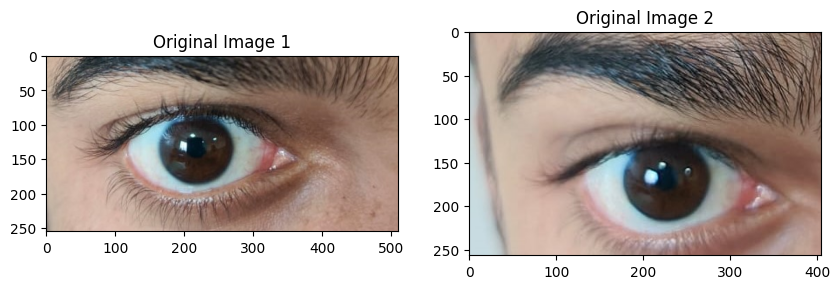

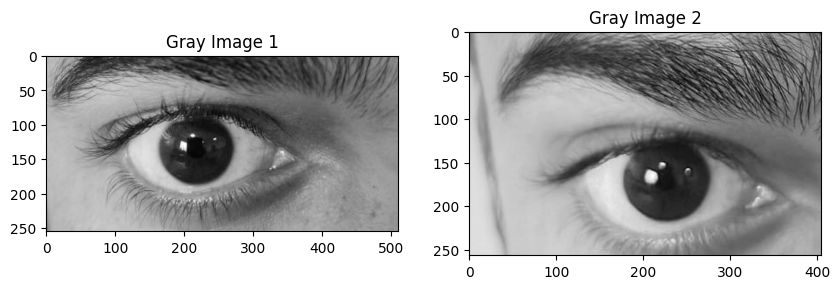

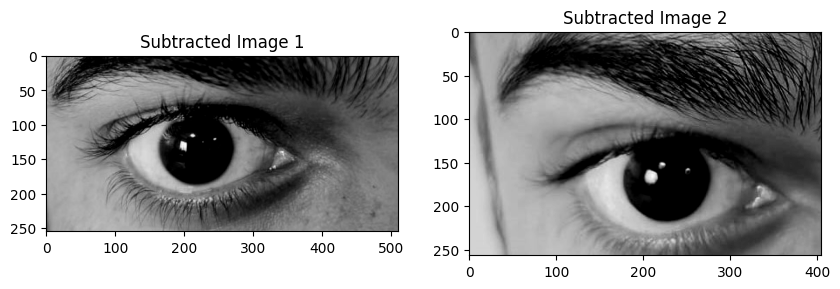

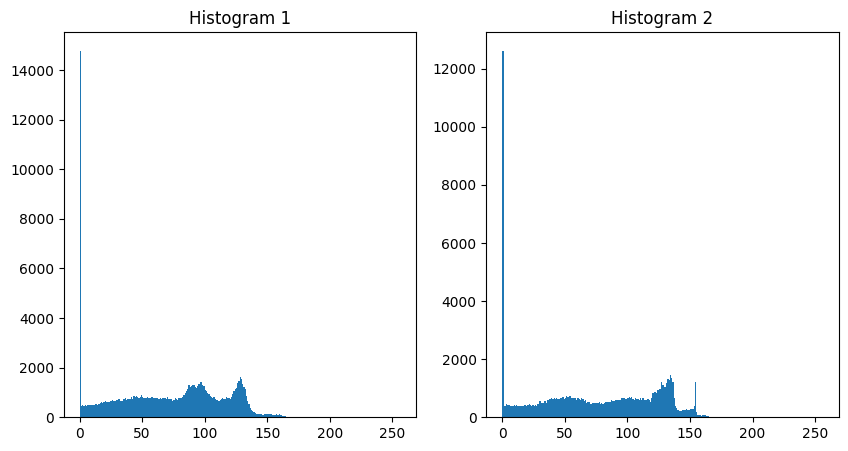

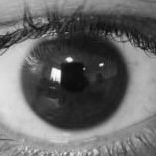

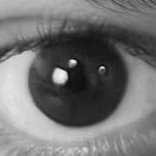

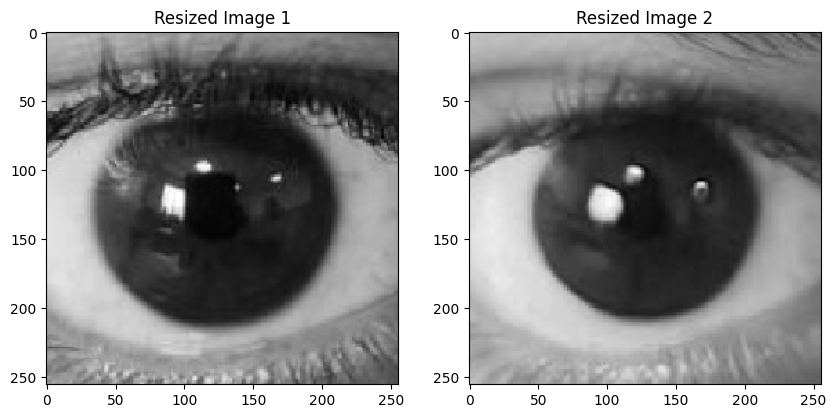

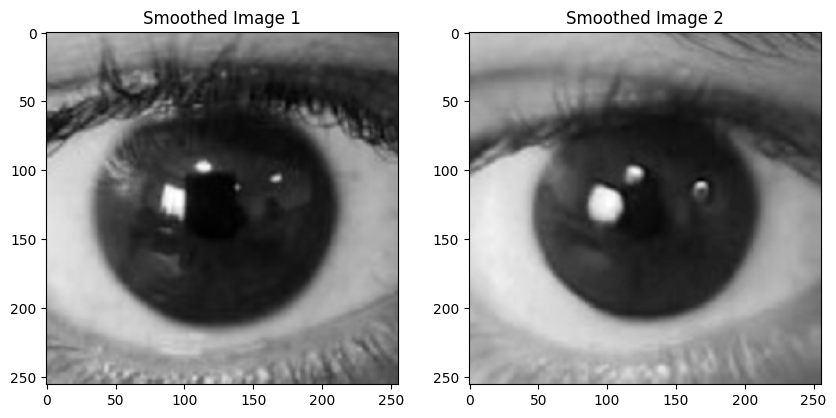

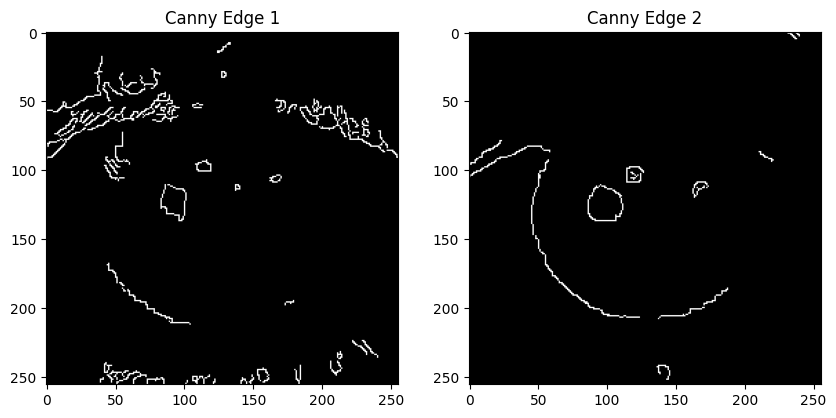

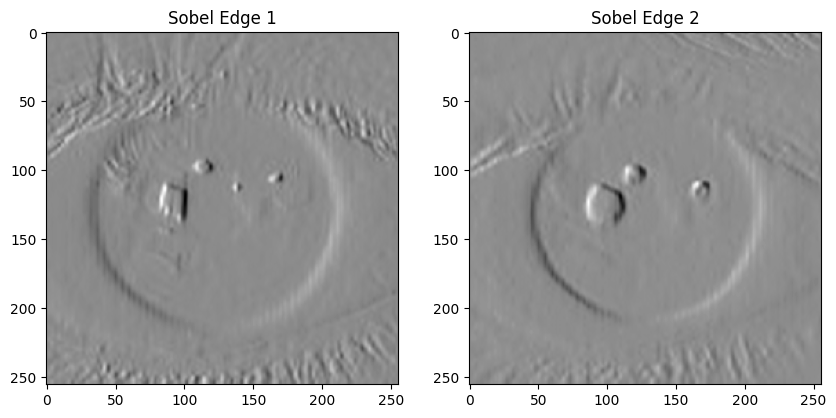

The iris are similar. [[0.81005836]]


In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature
from google.colab.patches import cv2_imshow

# Declaration
#im1 = input("Enter the 1st image path: ")
#im2 = input("Enter the 2nd image path:")
im1="/content/satikr1.jpg"
im2="/content/satwikr2.jpg"




# STEP 1: Image Acquisition
img1 = cv2.imread(im1)
img2 = cv2.imread(im2)

# Check if images are loaded successfully
if img1 is None or img2 is None:
    print("Error loading images.")
else:
    # STEP 2: Convert to Grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Plotting Original and Grayscale Images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)), plt.title('Original Image 1')
    plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)), plt.title('Original Image 2')
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1), plt.imshow(gray1, cmap='gray'), plt.title('Gray Image 1')
    plt.subplot(1, 2, 2), plt.imshow(gray2, cmap='gray'), plt.title('Gray Image 2')
    plt.show()

    # STEP 3: Subtract Image
    subtracted1 = cv2.subtract(gray1, np.full(gray1.shape, 60, dtype=np.uint8))
    subtracted2 = cv2.subtract(gray2, np.full(gray2.shape, 60, dtype=np.uint8))

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1), plt.imshow(subtracted1, cmap='gray'), plt.title('Subtracted Image 1')
    plt.subplot(1, 2, 2), plt.imshow(subtracted2, cmap='gray'), plt.title('Subtracted Image 2')
    plt.show()

    # STEP 4: Histogram of the Image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1), plt.hist(subtracted1.ravel(), bins=256, range=(0, 256)), plt.title('Histogram 1')
    plt.subplot(1, 2, 2), plt.hist(subtracted2.ravel(), bins=256, range=(0, 256)), plt.title('Histogram 2')
    plt.show()

    # Detect and crop the irises with expanded radius for outer layer
    def detect_iris_outer_layer(image, expansion_ratio=1.6):
        blurred = cv2.GaussianBlur(image, (9, 9), 2)
        circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.2, minDist=50, param1=100, param2=30, minRadius=10, maxRadius=50)
        if circles is not None:
            circles = circles[0, :].astype("int")
            for (x, y, r) in circles:
                expanded_r = int(r * expansion_ratio)
                top, bottom = max(0, y - expanded_r), min(image.shape[0], y + expanded_r)
                left, right = max(0, x - expanded_r), min(image.shape[1], x + expanded_r)
                crop = image[top:bottom, left:right]
                return crop
        else:
            print("No iris detected.")
            return None

    crop1 = detect_iris_outer_layer(gray1)
    crop2 = detect_iris_outer_layer(gray2)

    # Display cropped images
    if crop1 is not None:
        cv2_imshow(crop1)
    if crop2 is not None:
        cv2_imshow(crop2)

    # Further steps if iris detection was successful
    if crop1 is not None and crop2 is not None:
        resized1 = cv2.resize(crop1, (256, 256), interpolation=cv2.INTER_NEAREST)
        resized2 = cv2.resize(crop2, (256, 256), interpolation=cv2.INTER_NEAREST)

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1), plt.imshow(resized1, cmap='gray'), plt.title('Resized Image 1')
        plt.subplot(1, 2, 2), plt.imshow(resized2, cmap='gray'), plt.title('Resized Image 2')
        plt.show()

        smoothed1 = cv2.GaussianBlur(resized1, (3, 3), 0)
        smoothed2 = cv2.GaussianBlur(resized2, (3, 3), 0)

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1), plt.imshow(smoothed1, cmap='gray'), plt.title('Smoothed Image 1')
        plt.subplot(1, 2, 2), plt.imshow(smoothed2, cmap='gray'), plt.title('Smoothed Image 2')
        plt.show()

        # Edge Detection
        edges1 = cv2.Canny(smoothed1, 100, 200)
        edges2 = cv2.Canny(smoothed2, 100, 200)

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1), plt.imshow(edges1, cmap='gray'), plt.title('Canny Edge 1')
        plt.subplot(1, 2, 2), plt.imshow(edges2, cmap='gray'), plt.title('Canny Edge 2')
        plt.show()

        # Sobel Edge Detection
        sobel1 = cv2.Sobel(smoothed1, cv2.CV_64F, 1, 0, ksize=3)
        sobel2 = cv2.Sobel(smoothed2, cv2.CV_64F, 1, 0, ksize=3)

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1), plt.imshow(sobel1, cmap='gray'), plt.title('Sobel Edge 1')
        plt.subplot(1, 2, 2), plt.imshow(sobel2, cmap='gray'), plt.title('Sobel Edge 2')
        plt.show()

        # Iris Matching
        normalized1 = cv2.normalize(smoothed1, None, 0, 255, cv2.NORM_MINMAX)
        normalized2 = cv2.normalize(smoothed2, None, 0, 255, cv2.NORM_MINMAX)
        correlation = cv2.matchTemplate(normalized1, normalized2, cv2.TM_CCOEFF_NORMED)

        # Displaying matching result
        if np.max(correlation) >= 0.80:
            print("The iris are similar.", correlation)
        else:
            print("The iris are different.", correlation)
    else:
        print("Failed to detect iris in one or both images. Cannot proceed with further steps.")


These one is to Show the difference in the iris


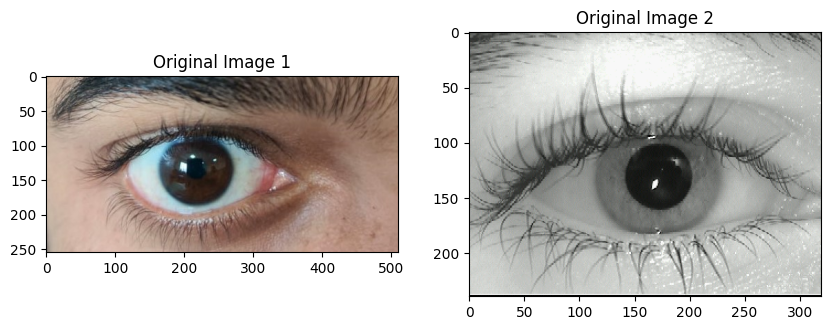

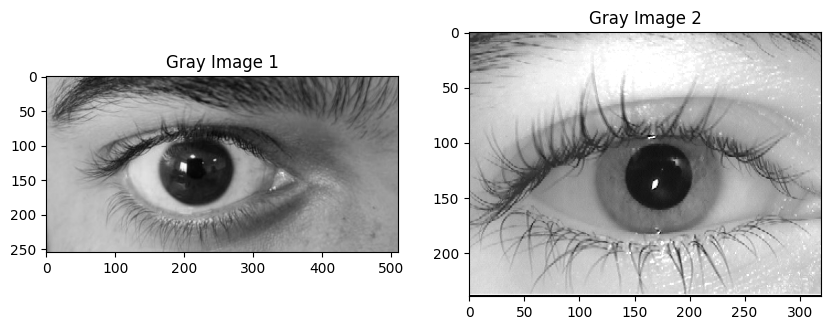

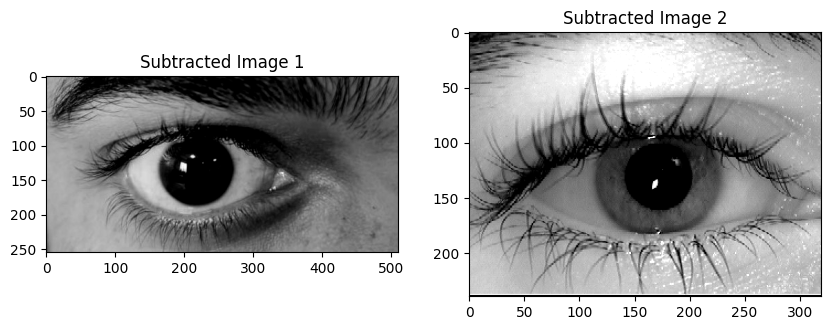

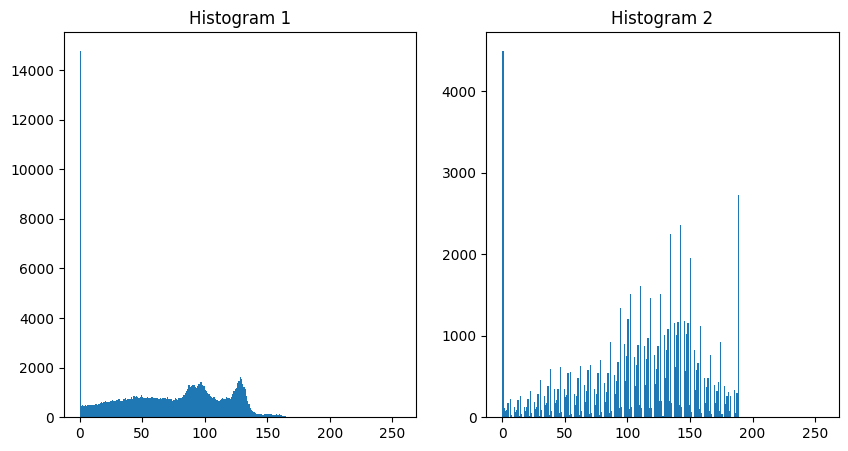

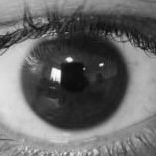

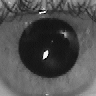

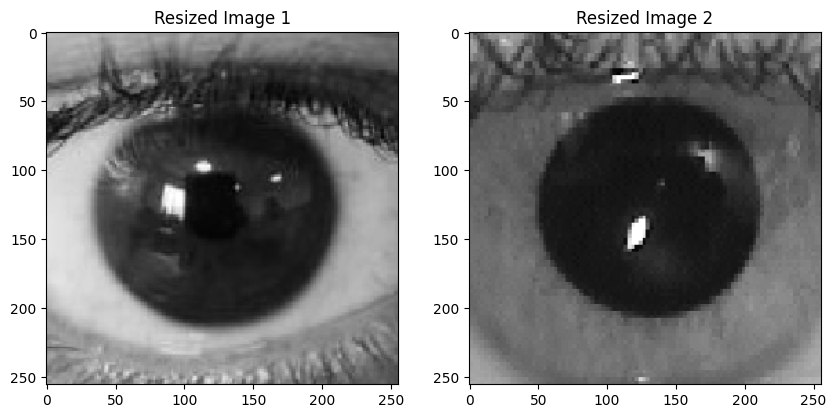

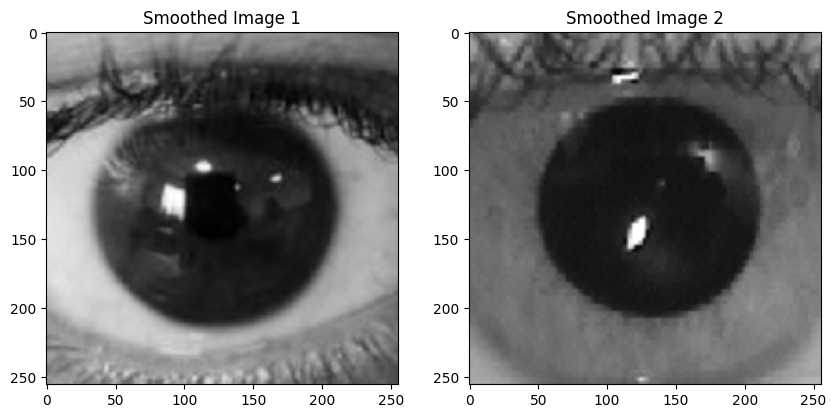

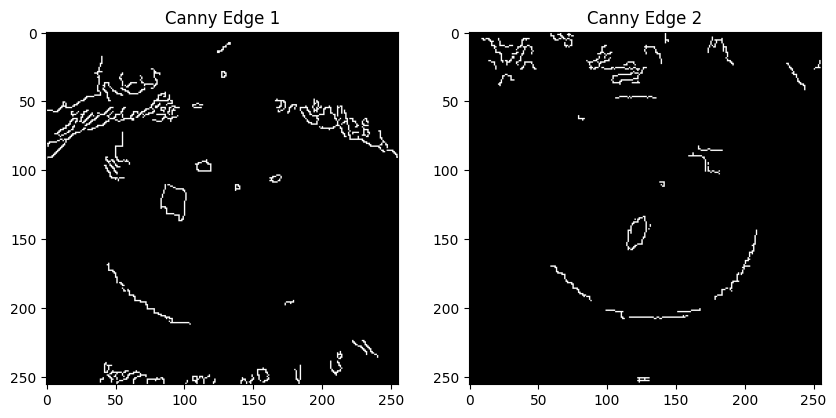

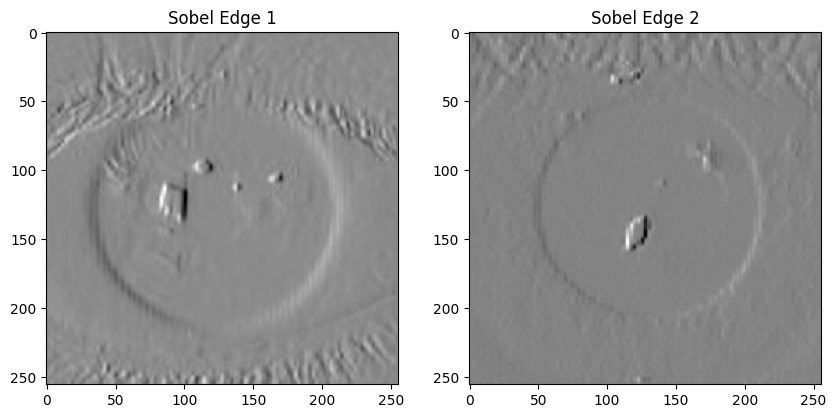

The iris are different. [[0.6558305]]


In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature
from google.colab.patches import cv2_imshow

# Declaration
#im1 = input("Enter the 1st image path: ")
#im2 = input("Enter the 2nd image path:")
im1="/content/satikr1.jpg"
im2="/content/maranr5.bmp"




# STEP 1: Image Acquisition
img1 = cv2.imread(im1)
img2 = cv2.imread(im2)

# Check if images are loaded successfully
if img1 is None or img2 is None:
    print("Error loading images.")
else:
    # STEP 2: Convert to Grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Plotting Original and Grayscale Images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)), plt.title('Original Image 1')
    plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)), plt.title('Original Image 2')
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1), plt.imshow(gray1, cmap='gray'), plt.title('Gray Image 1')
    plt.subplot(1, 2, 2), plt.imshow(gray2, cmap='gray'), plt.title('Gray Image 2')
    plt.show()

    # STEP 3: Subtract Image
    subtracted1 = cv2.subtract(gray1, np.full(gray1.shape, 60, dtype=np.uint8))
    subtracted2 = cv2.subtract(gray2, np.full(gray2.shape, 60, dtype=np.uint8))

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1), plt.imshow(subtracted1, cmap='gray'), plt.title('Subtracted Image 1')
    plt.subplot(1, 2, 2), plt.imshow(subtracted2, cmap='gray'), plt.title('Subtracted Image 2')
    plt.show()

    # STEP 4: Histogram of the Image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1), plt.hist(subtracted1.ravel(), bins=256, range=(0, 256)), plt.title('Histogram 1')
    plt.subplot(1, 2, 2), plt.hist(subtracted2.ravel(), bins=256, range=(0, 256)), plt.title('Histogram 2')
    plt.show()

    # Detect and crop the irises with expanded radius for outer layer
    def detect_iris_outer_layer(image, expansion_ratio=1.6):
        blurred = cv2.GaussianBlur(image, (9, 9), 2)
        circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.2, minDist=50, param1=100, param2=30, minRadius=10, maxRadius=50)
        if circles is not None:
            circles = circles[0, :].astype("int")
            for (x, y, r) in circles:
                expanded_r = int(r * expansion_ratio)
                top, bottom = max(0, y - expanded_r), min(image.shape[0], y + expanded_r)
                left, right = max(0, x - expanded_r), min(image.shape[1], x + expanded_r)
                crop = image[top:bottom, left:right]
                return crop
        else:
            print("No iris detected.")
            return None

    crop1 = detect_iris_outer_layer(gray1)
    crop2 = detect_iris_outer_layer(gray2)

    # Display cropped images
    if crop1 is not None:
        cv2_imshow(crop1)
    if crop2 is not None:
        cv2_imshow(crop2)

    # Further steps if iris detection was successful
    if crop1 is not None and crop2 is not None:
        resized1 = cv2.resize(crop1, (256, 256), interpolation=cv2.INTER_NEAREST)
        resized2 = cv2.resize(crop2, (256, 256), interpolation=cv2.INTER_NEAREST)

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1), plt.imshow(resized1, cmap='gray'), plt.title('Resized Image 1')
        plt.subplot(1, 2, 2), plt.imshow(resized2, cmap='gray'), plt.title('Resized Image 2')
        plt.show()

        smoothed1 = cv2.GaussianBlur(resized1, (3, 3), 0)
        smoothed2 = cv2.GaussianBlur(resized2, (3, 3), 0)

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1), plt.imshow(smoothed1, cmap='gray'), plt.title('Smoothed Image 1')
        plt.subplot(1, 2, 2), plt.imshow(smoothed2, cmap='gray'), plt.title('Smoothed Image 2')
        plt.show()

        # Edge Detection
        edges1 = cv2.Canny(smoothed1, 100, 200)
        edges2 = cv2.Canny(smoothed2, 100, 200)

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1), plt.imshow(edges1, cmap='gray'), plt.title('Canny Edge 1')
        plt.subplot(1, 2, 2), plt.imshow(edges2, cmap='gray'), plt.title('Canny Edge 2')
        plt.show()

        # Sobel Edge Detection
        sobel1 = cv2.Sobel(smoothed1, cv2.CV_64F, 1, 0, ksize=3)
        sobel2 = cv2.Sobel(smoothed2, cv2.CV_64F, 1, 0, ksize=3)

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1), plt.imshow(sobel1, cmap='gray'), plt.title('Sobel Edge 1')
        plt.subplot(1, 2, 2), plt.imshow(sobel2, cmap='gray'), plt.title('Sobel Edge 2')
        plt.show()

        # Iris Matching
        normalized1 = cv2.normalize(smoothed1, None, 0, 255, cv2.NORM_MINMAX)
        normalized2 = cv2.normalize(smoothed2, None, 0, 255, cv2.NORM_MINMAX)
        correlation = cv2.matchTemplate(normalized1, normalized2, cv2.TM_CCOEFF_NORMED)

        # Displaying matching result
        if np.max(correlation) >= 0.80:
            print("The iris are similar.", correlation)
        else:
            print("The iris are different.", correlation)
    else:
        print("Failed to detect iris in one or both images. Cannot proceed with further steps.")
